# Sentiment Analysis of Yelp Reviews (Modelling)

---

## Contents

* [Introduction](#Introduction)          


* [Part 1: Machine Learning with Extracted Features](#Part1)
    * [Logistic Regression](#Logistic_Regression)
    * [Random Forest](#Random_Forest)
    * [Support Vector Classification](#SVC)
    * [Gradient Boosted Classification](#GBC)
    * [Results](#Results1)   
    

* [Part 2: Machine Learning with Bag of Words](#Part2)
    * [Naive Bayes with CountVectorizer](#NB_CV)
    * [Naive Bayes with TFIDF](#NB_TF)
    * [Gradient Boosted Classification with Count Vectorizer](#GBC_CV)
    * [Gradient Boosted Classification with TFIDF](#GBC_TF)
    * [Logistic Regression with Count Vectorizer](#LR_CV)
    * [Logistic Regression with TFIDF](#LR_TF)
    * [Results](#Results2)      
    

* [Part 3: Embedding Techniques](#Part3)
    * [Dense + Sparse Features](#Dense)
    * [Naive Bayes Probability with Dense + Sparse Features](#NB_Sparse)
    * [Stacked Model](#Stacked)
    * [Results](#Results3)       
    
    
* [Conclusion](#Conclusion)

---

## Introduction

We've collected the data, analyzed it, found the most important feautres, and have a baseline accuracy of around 72%. Now, we'll be going through some other methods of modeling to find the most accurate version so we can deploy it for future yelp review classifications.

---

### Objectives

In this notebook we will:

* Test out multiple different models
* Including Regular ML Models with our extracted features and embedded models with sparse/dense text matrices

---

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.sparse import coo_matrix, hstack

import pickle
from pycm import *

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
yelp_data = pd.read_csv('./data/yelp_data_sentiment.csv')
yelp_data.head()

,resturant_name,yelp_review,polarity,review_sentiment,proportion_positive,park,bake,shop,becom,go,...,jukebox,bruschetta,calzon,pizzeria,antipasto,linguini,zucchini,player,sicilian,castl
0,Morris Park Bake Shop,morris park bake shop has become my go to spot...,0.338889,slightly positive,0.2143,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Morris Park Bake Shop,i thought the cookies and biscotti were prett...,0.314583,slightly positive,0.1500,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Morris Park Bake Shop,guys.... so im a big time biscotti connoisseu...,0.238068,slightly positive,0.1477,0.0,0.096569,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.152041,0.0,0.0,0.0,0.0
3,Morris Park Bake Shop,i had a craving for a special type of cake wi...,0.314643,slightly positive,0.2414,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Morris Park Bake Shop,the chocolate cups are amazing! have been eat...,0.500000,positive,0.2500,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Part 1: Machine Learning with Extracted Features <a id='Part1'></a>

There are many different models we can try but to start, we're going to work with the standard machine learning models like logistic regression and random forest.

I'll be collecting accuracy and f1 scores along the way to see which model performs the best with this data!

---

Here's what the process will look like:

* Choose a model type
* Define a pipeline and use GridSearch to find the best parameters
* Save the model so we don't have the run the cell multiple times
* Load the model and run accuracy and f1 scores
* Move on to the next model

---

In [3]:
X = yelp_data.iloc[:,4:] # features
y = yelp_data['review_sentiment'] # target
indices = yelp_data.index

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, test_size=0.2, random_state=7)

### Logistic Regression <a id='Logistic_Regression'></a>  

We're going to create a pipeline that uses the standard scaler and a classifier using GridSearch to find the best parameters.

---

In [5]:
steps = [('scaler', StandardScaler()), ('lr', LogisticRegression())]
pipeline = Pipeline(steps)
parameters = {'lr__C': [0.01, 0.1, 1, 10, 100]}

log_reg = GridSearchCV(pipeline, parameters, cv=10, scoring='accuracy')
log_reg.fit(X_train, y_train)
log_reg.best_params_

{'lr__C': 0.1}

In [6]:
filename = './models/log_reg.sav'
pickle.dump(log_reg, open(filename, 'wb'))

In [7]:
log_reg = pickle.load(open(filename, 'rb'))

In [8]:
predictions = log_reg.predict(X_test)

In [9]:
test_accuracy = log_reg.score(X_test, y_test)
f1_accuracy_macro = f1_score(y_test, predictions, average='macro')
f1_accuracy_micro = f1_score(y_test, predictions, average='micro')
f1_accuracy_weighted = f1_score(y_test, predictions, average='weighted')

print('Accuracy on test data: ' ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy_macro)
print('F1 Score (micro): ', f1_accuracy_micro)
print('F1 Score (weighted): ', f1_accuracy_weighted)

Accuracy on test data:  0.7573479152426521
F1 Score (macro):  0.7534061881442666
F1 Score (micro):  0.757347915242652
F1 Score (weighted):  0.7574020669711642


In [10]:
# Assign metric to variables
lr_acc = test_accuracy
lr_f1_macro = f1_accuracy_macro
lr_f1_micro = f1_accuracy_micro
lr_f1_weighted = f1_accuracy_weighted

### Random Forest <a id='Random_Forest'></a>

Same thing here, first we'll make a pipeline and then use grid search to find the best parameters to tune this model. However, there is no need to scale as this is a tree-based model.

---

In [11]:
steps = [('rf', RandomForestClassifier())]
pipeline = Pipeline(steps)
parameters = {'rf__n_estimators': [10 , 20, 30, 40, 50], 'rf__max_features': ['auto','sqrt']}

forest = GridSearchCV(pipeline, parameters, cv=10, scoring='accuracy')
forest.fit(X_train, y_train)
forest.best_params_

{'rf__max_features': 'auto', 'rf__n_estimators': 50}

In [12]:
filename = './models/forest.sav'
pickle.dump(forest, open(filename, 'wb'))

In [13]:
forest = pickle.load(open(filename, 'rb'))

In [14]:
predictions = forest.predict(X_test)

In [15]:
test_accuracy = forest.score(X_test, y_test)
f1_accuracy_macro = f1_score(y_test, predictions, average='macro')
f1_accuracy_micro = f1_score(y_test, predictions, average='micro')
f1_accuracy_weighted = f1_score(y_test, predictions, average='weighted')

print('Accuracy on test data: ' ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy_macro)
print('F1 Score (micro): ', f1_accuracy_micro)
print('F1 Score (weighted): ', f1_accuracy_weighted)

Accuracy on test data:  0.6285030758714969
F1 Score (macro):  0.6238271787411696
F1 Score (micro):  0.6285030758714969
F1 Score (weighted):  0.6272701349332778


In [16]:
# Assign metric to variables
rf_acc = test_accuracy
rf_f1_macro = f1_accuracy_macro
rf_f1_micro = f1_accuracy_micro
rf_f1_weighted = f1_accuracy_weighted

### Support Vector Classification <a id='SVC'></a>

In [17]:
steps = [('scaler', StandardScaler()), ('svc', SVC())]
pipeline = Pipeline(steps)
parameters = {'svc__C':[0.01, 0.1, 1]}

svc = GridSearchCV(pipeline, parameters, cv=3, scoring='accuracy')
svc.fit(X_train, y_train)
svc.best_params_

{'svc__C': 1}

In [18]:
filename = './models/svc.sav'
pickle.dump(svc, open(filename, 'wb'))

In [19]:
svc = pickle.load(open(filename, 'rb'))

In [20]:
predictions = svc.predict(X_test)

In [21]:
test_accuracy = svc.score(X_test, y_test)
f1_accuracy_macro = f1_score(y_test, predictions, average='macro')
f1_accuracy_micro = f1_score(y_test, predictions, average='micro')
f1_accuracy_weighted = f1_score(y_test, predictions, average='weighted')

print('Accuracy on test data: ' ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy_macro)
print('F1 Score (micro): ', f1_accuracy_micro)
print('F1 Score (weighted): ', f1_accuracy_weighted)

Accuracy on test data:  0.6852358168147642
F1 Score (macro):  0.6681635063979938
F1 Score (micro):  0.6852358168147642
F1 Score (weighted):  0.6818816342919244


In [22]:
# Assign metric to variables
svc_acc = test_accuracy
svc_f1_macro = f1_accuracy_macro
svc_f1_micro = f1_accuracy_micro
svc_f1_weighted = f1_accuracy_weighted

### Gradient Boosted Classification <a id='GBC'></a>

Similar to random forest, GBM are a form of tree-based model and we can exclude the scaling step.

---

In [23]:
steps = [('gbc', GradientBoostingClassifier(max_features='sqrt'))]
pipeline = Pipeline(steps) 
parameters = {'gbc__n_estimators':[10, 50, 100, 200, 500], 'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

gbm = GridSearchCV(pipeline, parameters, cv=10, scoring='accuracy')
gbm.fit(X_train, y_train)
gbm.best_params_

{'gbc__learning_rate': 0.25, 'gbc__n_estimators': 500}

In [24]:
steps = [('gbc', GradientBoostingClassifier(learning_rate=0.25, max_features='sqrt', n_estimators=500))] 
gbm = Pipeline(steps) 
gbm.fit(X_train, y_train)

Pipeline(steps=[('gbc',
                 GradientBoostingClassifier(learning_rate=0.25,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [25]:
filename = './models/gbm.sav'
pickle.dump(gbm, open(filename, 'wb'))

In [26]:
gbm = pickle.load(open(filename, 'rb'))

In [27]:
predictions = gbm.predict(X_test)

In [28]:
test_accuracy = gbm.score(X_test, y_test)
f1_accuracy_macro = f1_score(y_test, predictions, average='macro')
f1_accuracy_micro = f1_score(y_test, predictions, average='micro')
f1_accuracy_weighted = f1_score(y_test, predictions, average='weighted')

print('Accuracy on test data: ' ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy_macro)
print('F1 Score (micro): ', f1_accuracy_micro)
print('F1 Score (weighted): ', f1_accuracy_weighted)

Accuracy on test data:  0.7012987012987013
F1 Score (macro):  0.7032187056262862
F1 Score (micro):  0.7012987012987013
F1 Score (weighted):  0.7013026585270291


In [29]:
# Assign metric to variables
gbm_acc = test_accuracy
gbm_f1_macro = f1_accuracy_macro
gbm_f1_micro = f1_accuracy_micro
gbm_f1_weighted = f1_accuracy_weighted

### Results <a id='Results1'></a>

Now we have all our scores, let's see which model performed the best.

---

In [31]:
result_1 = pd.DataFrame({'Model':['Logistic Regression', 'Random Forest', 'SVC', 'GBC'],
                         'Accuracy':[lr_acc, rf_acc, svc_acc, gbm_acc],
                         'F1_Macro':[lr_f1_macro, rf_f1_macro, svc_f1_macro, gbm_f1_macro],
                         'F1_Micro':[lr_f1_micro, rf_f1_micro, svc_f1_micro, gbm_f1_micro],
                         'F1_Weighted':[lr_f1_weighted, rf_f1_weighted, svc_f1_weighted, gbm_f1_weighted]})

result_1 = result_1.round(3)
result_1

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,Logistic Regression,0.757,0.753,0.757,0.757
1,Random Forest,0.629,0.624,0.629,0.627
2,SVC,0.685,0.668,0.685,0.682
3,GBC,0.701,0.703,0.701,0.701


---

Looks like the <u>**Logistic Regression**</u> has the highest scores in all categories.

---

## Part 2: Machine Learning with Bag of Words <a id='Part2'></a>

We've already done feature selection for our text, but with these methods we should be able to construct a dense/sparse text matrix and make an independent prediction based on just the text.

The goal here is to find a purely text based model to generate a prediction.

---

In [32]:
# Generate new train and test sets
X = yelp_data['yelp_review']
y = yelp_data['review_sentiment']
indices = yelp_data.index

In [33]:
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, test_size=0.2, random_state=7)

### Naive Bayes with CountVectorizer <a id='NB_CV'></a>

Now we're going to test two classification methods with two different text vectorizers to get the best result. First, we'll do Naive Bayes with CV and TFIDF.

---

In [34]:
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1, 2))), ('nb', MultinomialNB())]
pipeline = Pipeline(steps)
parameters = {'vec__min_df': [0.01, 0.1, 1, 10, 100], 'nb__alpha': [0.01, 0.1, 1, 10, 100]}

mnb = GridSearchCV(pipeline, parameters, cv=10, scoring='accuracy')
mnb.fit(X_train, y_train)
mnb.best_params_

{'nb__alpha': 0.01, 'vec__min_df': 0.01}

In [35]:
filename = './models/mnb_cv.sav'
pickle.dump(mnb, open(filename, 'wb'))

In [36]:
mnb = pickle.load(open(filename, 'rb'))

In [37]:
predictions = mnb.predict(X_test)

In [38]:
test_accuracy = mnb.score(X_test, y_test)
probs = mnb.predict_proba(X_test)[:, 1]
f1_accuracy_macro = f1_score(y_test, predictions, average='macro')
f1_accuracy_micro = f1_score(y_test, predictions, average='micro')
f1_accuracy_weighted = f1_score(y_test, predictions, average='weighted')

print('Accuracy on test data: ' , test_accuracy)
print('F1 Score (macro): ', f1_accuracy_macro)
print('F1 Score (micro): ', f1_accuracy_micro)
print('F1 Score (weighted): ', f1_accuracy_weighted)

Accuracy on test data:  0.5892002734107997
F1 Score (macro):  0.5921699380997087
F1 Score (micro):  0.5892002734107997
F1 Score (weighted):  0.5873456260853475


In [39]:
# Assign metric to variables
mnb_cv_acc = test_accuracy
mnb_cv_f1_macro = f1_accuracy_macro
mnb_cv_f1_micro = f1_accuracy_micro
mnb_cv_f1_weighted = f1_accuracy_weighted

### Naive Bayes with TFIDF <a id='NB_TF'></a>

In [40]:
steps = [('vec', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))), ('nb', MultinomialNB())]
pipeline = Pipeline(steps)
parameters = {'vec__min_df': [0.01, 0.1, 1, 10, 100], 'nb__alpha': [0.01, 0.1, 1, 10, 100]}

mnb = GridSearchCV(pipeline, parameters, cv=10, scoring='accuracy')
mnb.fit(X_train, y_train)
mnb.best_params_

{'nb__alpha': 0.01, 'vec__min_df': 0.01}

In [41]:
filename = './models/mnb_tf.sav'
pickle.dump(mnb, open(filename, 'wb'))

In [42]:
mnb = pickle.load(open(filename, 'rb'))

In [43]:
predictions = mnb.predict(X_test)

In [44]:
test_accuracy = mnb.score(X_test, y_test)
probs = mnb.predict_proba(X_test)[:, 1]
f1_accuracy_macro = f1_score(y_test, predictions, average='macro')
f1_accuracy_micro = f1_score(y_test, predictions, average='micro')
f1_accuracy_weighted = f1_score(y_test, predictions, average='weighted')

print('Accuracy on test data: ' , test_accuracy)
print('F1 Score (macro): ', f1_accuracy_macro)
print('F1 Score (micro): ', f1_accuracy_micro)
print('F1 Score (weighted): ', f1_accuracy_weighted)

Accuracy on test data:  0.5762132604237867
F1 Score (macro):  0.546581002618255
F1 Score (micro):  0.5762132604237867
F1 Score (weighted):  0.5617278041743015


In [45]:
# Assign metric to variables
mnb_tf_acc = test_accuracy
mnb_tf_f1_macro = f1_accuracy_macro
mnb_tf_f1_micro = f1_accuracy_micro
mnb_tf_f1_weighted = f1_accuracy_weighted

### Gradient Boosted Classification with Count Vectorizer <a id='GBC_CV'></a>

In [47]:
steps = [('vec', CountVectorizer(min_df=1, stop_words='english', ngram_range=(1,2))), 
         ('gbc', GradientBoostingClassifier(max_features='sqrt'))]
pipeline = Pipeline(steps)
parameters = {'gbc__n_estimators': [10, 50, 100, 200, 500], 'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}
gbm = GridSearchCV(pipeline, parameters, cv=3, scoring='accuracy')
gbm.fit(X_train, y_train)
gbm.best_params_

{'gbc__learning_rate': 0.25, 'gbc__n_estimators': 500}

In [48]:
steps = [('vec', CountVectorizer(min_df=1, stop_words='english', ngram_range=(1,2))), 
         ('gbc', GradientBoostingClassifier(learning_rate=0.25, max_features='sqrt', n_estimators=500))] 
gbm = Pipeline(steps) 
gbm.fit(X_train, y_train)

Pipeline(steps=[('vec',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.25,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [49]:
filename = './models/gbm_cv.sav'
pickle.dump(gbm, open(filename, 'wb'))

In [50]:
gbm = pickle.load(open(filename, 'rb'))

In [51]:
predictions = gbm.predict(X_test)

In [52]:
test_accuracy = gbm.score(X_test, y_test)
probs = gbm.predict_proba(X_test)[:, 1]
f1_accuracy_macro = f1_score(y_test, predictions, average='macro')
f1_accuracy_micro = f1_score(y_test, predictions, average='micro')
f1_accuracy_weighted = f1_score(y_test, predictions, average='weighted')

print('Accuracy on test data: ' , test_accuracy)
print('F1 Score (macro): ', f1_accuracy_macro)
print('F1 Score (micro): ', f1_accuracy_micro)
print('F1 Score (weighted): ', f1_accuracy_weighted)

Accuracy on test data:  0.6151742993848257
F1 Score (macro):  0.6068402353651388
F1 Score (micro):  0.6151742993848257
F1 Score (weighted):  0.6114024473315287


In [53]:
# Assign metric to variables
gbm_cv_acc = test_accuracy
gbm_cv_f1_macro = f1_accuracy_macro
gbm_cv_f1_micro = f1_accuracy_micro
gbm_cv_f1_weighted = f1_accuracy_weighted

### Gradient Boosted Classification with TFIDF <a id='GBC_TF'></a>

In [54]:
steps = [('vec', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), 
         ('gbc', GradientBoostingClassifier(max_features='sqrt', n_estimators=500))]
pipeline = Pipeline(steps)
parameters = {'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}
gbm = GridSearchCV(pipeline, parameters, cv=3, scoring='accuracy')
gbm.fit(X_train, y_train)
gbm.best_params_

{'gbc__learning_rate': 0.25}

In [61]:
steps = [('vec', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), 
         ('gbc', GradientBoostingClassifier(learning_rate=0.25, max_features='sqrt', n_estimators=500))] 
gbm = Pipeline(steps) 
gbm.fit(X_train, y_train)

Pipeline(steps=[('vec',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.25,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [62]:
filename = './models/gbm_tf.sav'
pickle.dump(gbm, open(filename, 'wb'))

In [63]:
gbm = pickle.load(open(filename, 'rb'))

In [64]:
predictions = gbm.predict(X_test)

In [65]:
test_accuracy = gbm.score(X_test, y_test)
probs = gbm.predict_proba(X_test)[:, 1]
f1_accuracy_macro = f1_score(y_test, predictions, average='macro')
f1_accuracy_micro = f1_score(y_test, predictions, average='micro')
f1_accuracy_weighted = f1_score(y_test, predictions, average='weighted')

print('Accuracy on test data: ' , test_accuracy)
print('F1 Score (macro): ', f1_accuracy_macro)
print('F1 Score (micro): ', f1_accuracy_micro)
print('F1 Score (weighted): ', f1_accuracy_weighted)

Accuracy on test data:  0.6035543403964456
F1 Score (macro):  0.6088842084350928
F1 Score (micro):  0.6035543403964456
F1 Score (weighted):  0.6009713597852001


In [66]:
# Assign metric to variables
gbm_tf_acc = test_accuracy
gbm_tf_f1_macro = f1_accuracy_macro
gbm_tf_f1_micro = f1_accuracy_micro
gbm_tf_f1_weighted = f1_accuracy_weighted

### Logistic Regression with Count Vectorizer <a id='LR_CV'></a>

In [67]:
steps = [('vec', CountVectorizer(min_df=1, stop_words='english', ngram_range=(1,2))), 
         ('lr', LogisticRegression())]
pipeline = Pipeline(steps)
parameters = {'lr__C': [0.01, 0.1, 1, 10, 100]}

log_reg = GridSearchCV(pipeline, parameters, cv=10, scoring='accuracy')
log_reg.fit(X_train, y_train)
log_reg.best_params_

{'lr__C': 0.1}

In [68]:
filename = './models/lr_cv.sav'
pickle.dump(log_reg, open(filename, 'wb'))

In [69]:
log_reg = pickle.load(open(filename, 'rb'))

In [70]:
predictions = log_reg.predict(X_test)

In [71]:
test_accuracy = log_reg.score(X_test, y_test)
probs = log_reg.predict_proba(X_test)[:, 1]
f1_accuracy_macro = f1_score(y_test, predictions, average='macro')
f1_accuracy_micro = f1_score(y_test, predictions, average='micro')
f1_accuracy_weighted = f1_score(y_test, predictions, average='weighted')

In [72]:
print('Accuracy on test data: ' ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy_macro)
print('F1 Score (micro): ', f1_accuracy_micro)
print('F1 Score (weighted): ', f1_accuracy_weighted)

Accuracy on test data:  0.7084757347915243
F1 Score (macro):  0.7119613270094336
F1 Score (micro):  0.7084757347915243
F1 Score (weighted):  0.7082480086275422


In [73]:
# Assign metric to variables
lr_cv_acc = test_accuracy
lr_cv_f1_macro = f1_accuracy_macro
lr_cv_f1_micro = f1_accuracy_micro
lr_cv_f1_weighted = f1_accuracy_weighted

### Logistic Regression with TFIDF <a id='LR_TF'></a>

In [74]:
steps = [('vec', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), 
         ('lr', LogisticRegression())]
pipeline = Pipeline(steps)
parameters = {'lr__C': [0.01, 0.1, 1, 10, 100]}

log_reg = GridSearchCV(pipeline, parameters, cv=10, scoring='accuracy')
log_reg.fit(X_train, y_train)
log_reg.best_params_

{'lr__C': 100}

In [75]:
filename = './models/lr_tf.sav'
pickle.dump(log_reg, open(filename, 'wb'))

In [76]:
log_reg = pickle.load(open(filename, 'rb'))

In [77]:
predictions = log_reg.predict(X_test)

In [78]:
test_accuracy = log_reg.score(X_test, y_test)
probs = log_reg.predict_proba(X_test)[:, 1]
f1_accuracy_macro = f1_score(y_test, predictions, average='macro')
f1_accuracy_micro = f1_score(y_test, predictions, average='micro')
f1_accuracy_weighted = f1_score(y_test, predictions, average='weighted')

In [79]:
print('Accuracy on test data: ' ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy_macro)
print('F1 Score (micro): ', f1_accuracy_micro)
print('F1 Score (weighted): ', f1_accuracy_weighted)

Accuracy on test data:  0.6753246753246753
F1 Score (macro):  0.6686276799999811
F1 Score (micro):  0.6753246753246753
F1 Score (weighted):  0.6743840838367181


In [80]:
# Assign metric to variables
lr_tf_acc = test_accuracy
lr_tf_f1_macro = f1_accuracy_macro
lr_tf_f1_micro = f1_accuracy_micro
lr_tf_f1_weighted = f1_accuracy_weighted

### Results <a id='Results2'></a>

In [83]:
result_2 = pd.DataFrame({'Model':['MultinomialNB (CV)', 'MultinomialNB (TF)', 
                                  'GradientBoostingClassifier (CV)', 'GradientBoostingClassifier (TF)',
                                  'Logistic Regression (CV)', 'Logistic Regression (TF)'],
                         'Accuracy':[mnb_cv_acc, 
                                     mnb_tf_acc, 
                                     gbm_cv_acc, 
                                     gbm_tf_acc,
                                     lr_cv_acc, 
                                     lr_tf_acc],
                         'F1_Macro':[mnb_cv_f1_macro, 
                                     mnb_tf_f1_macro, 
                                     gbm_cv_f1_macro, 
                                     gbm_tf_f1_macro, 
                                     lr_cv_f1_macro, 
                                     lr_tf_f1_macro],
                         'F1_Micro':[mnb_cv_f1_micro, 
                                     mnb_tf_f1_micro, 
                                     gbm_cv_f1_micro, 
                                     gbm_tf_f1_micro, 
                                     lr_cv_f1_micro, 
                                     lr_tf_f1_micro],
                         'F1_Weighted':[mnb_cv_f1_weighted, 
                                        mnb_tf_f1_weighted, 
                                        gbm_cv_f1_weighted, 
                                        gbm_tf_f1_weighted, 
                                        lr_cv_f1_weighted, 
                                        lr_tf_f1_weighted]})

result_2 = result_2.round(3)
result_2

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,MultinomialNB (CV),0.589,0.592,0.589,0.587
1,MultinomialNB (TF),0.576,0.547,0.576,0.562
2,GradientBoostingClassifier (CV),0.615,0.607,0.615,0.611
3,GradientBoostingClassifier (TF),0.604,0.609,0.604,0.601
4,Logistic Regression (CV),0.708,0.712,0.708,0.708
5,Logistic Regression (TF),0.675,0.669,0.675,0.674


---

In this case, seems like Logistic Regression is still the better model albeit performing a little less well than the initial method.

---

## Part 3: Embedding Techniques <a id='Part3'></a>

Next, we'll calculate the sparse/dense matrix of all the review's text and run it through the Multinomial Naive Bayes TFIDF model to get a probability for each classification group.

Once we have that probability we can add it as a feature to the GBC model and have a stacked model which should be much more accurate.

---

### Dense + Sparse Features <a id='Dense'></a>

In [84]:
df_combined = yelp_data
df_combined['text'] = yelp_data['yelp_review']

vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
vec_fit = vec.fit(df_combined.text)

sf = vec.fit_transform(df_combined.text)
sf

<14630x446361 sparse matrix of type '<class 'numpy.float64'>'
	with 1326691 stored elements in Compressed Sparse Row format>

In [85]:
dense_feat = df_combined.drop(['resturant_name', 'yelp_review', 'review_sentiment','text'], axis=1)

scaler = MinMaxScaler()

dense_feat = scaler.fit_transform(dense_feat)
dense_feat

array([[0.66944444, 0.267875  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65729167, 0.1875    , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61903409, 0.184625  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.72916667, 0.238125  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50952381, 0.0555    , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.048125  , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [86]:
dense_feat = coo_matrix(dense_feat)
dense_feat

<14630x1555 sparse matrix of type '<class 'numpy.float64'>'
	with 590213 stored elements in COOrdinate format>

---

590,213 is a lot, but it's much less than 1,000,000.

---

In [87]:
# New training data with the same text but in dense matrix format
X = hstack([sf, dense_feat.astype(float)])
y = yelp_data['review_sentiment']
indices = yelp_data.index

In [88]:
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, test_size=0.2, random_state=7)

In [89]:
X_train

<11704x447916 sparse matrix of type '<class 'numpy.float64'>'
	with 1540338 stored elements in Compressed Sparse Row format>

### Naive Bayes Probability with Dense + Sparse Features <a id='NB_Sparse'></a>

In [90]:
steps = [('nb', MultinomialNB())] 
pipeline = Pipeline(steps) 
parameters = {'nb__alpha': [0.01, 0.1, 1, 10, 100]}
mnb = GridSearchCV(pipeline, parameters, cv=10, scoring='accuracy') 

mnb.fit(X_train, y_train)
mnb.best_params_

{'nb__alpha': 0.01}

In [91]:
filename = './models/stacked_nb_ds.sav'
pickle.dump(mnb, open(filename, 'wb'))

In [92]:
mnb = pickle.load(open(filename, 'rb'))

In [93]:
predictions = mnb.predict(X_test)

In [94]:
test_accuracy = mnb.score(X_test, y_test)
probs = mnb.predict_proba(X_test)[:, 1]
f1_accuracy_macro = f1_score(y_test, predictions, average='macro')
f1_accuracy_micro = f1_score(y_test, predictions, average='micro')
f1_accuracy_weighted = f1_score(y_test, predictions, average='weighted')

print('Accuracy on test data: ' ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy_macro)
print('F1 Score (micro): ', f1_accuracy_micro)
print('F1 Score (weighted): ', f1_accuracy_weighted)

Accuracy on test data:  0.5919343814080656
F1 Score (macro):  0.59825183960955
F1 Score (micro):  0.5919343814080656
F1 Score (weighted):  0.5856175710735403


In [95]:
# Assign metric to variables
stacked_nb_ds_acc = test_accuracy
stacked_nb_ds_macro = f1_accuracy_macro
stacked_nb_ds_micro = f1_accuracy_micro
stacked_nb_ds_weighted = f1_accuracy_weighted

### Stacked Model (dense and sparse features + numerical features) <a id='Stacked'></a>

First step is to make a new  train test split that is just text based, then we can compute the probability that the text is in one of four categories using the dense NB model above

---

In [97]:
X = yelp_data['yelp_review']
y = yelp_data['review_sentiment']
indices = yelp_data.index

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, test_size=0.2, random_state=7)

In [98]:
steps = [('vec', CountVectorizer(stop_words='english', ngram_range=(1, 2))),
         ('nb', MultinomialNB())]
pipeline = Pipeline(steps)
parameters = {'vec__min_df':[0.01, 0.1, 1, 10, 100],
              'nb__alpha':[0.01, 0.1, 1, 10, 100]}

mnb = GridSearchCV(pipeline, parameters, cv=10, scoring='accuracy')
mnb.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vec',
                                        CountVectorizer(ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.01, 0.1, 1, 10, 100],
                         'vec__min_df': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [99]:
mnb.best_params_

{'nb__alpha': 0.01, 'vec__min_df': 0.01}

---

Now that we have our model, let's calculate probability.

---

In [100]:
X_train_proba = pd.DataFrame(mnb.predict_proba(X_train), index=i_train)
X_test_proba = pd.DataFrame(mnb.predict_proba(X_test), index=i_test)

In [101]:
# Removing 'text' feature because we already have 'yelp_review' column
yelp_data = yelp_data.drop(labels='text', axis=1)

---

Now we can use our original dataset, which included percentage of positive words and TFIDF values and combine it with the probability features to create an improved test/train split.

---

In [102]:
X = yelp_data.iloc[0:,4:]
y = yelp_data['review_sentiment']
indices = yelp_data.index

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, indices, test_size=0.2, random_state=7)

In [104]:
X_train_combined = pd.merge(X_train, X_train_proba, left_index=True, right_index=True)
X_test_combined = pd.merge(X_test, X_test_proba, left_index=True, right_index=True)

---

Here's what the combined training data looks like:

---

In [105]:
X_train_combined.head()

,proportion_positive,park,bake,shop,becom,go,spot,atmospher,place,great,...,antipasto,linguini,zucchini,player,sicilian,castl,0,1,2,3
742,0.2581,0.0,0.175109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.979864,3.459854e-06,1.980896e-02,3.240023e-04
3133,0.0917,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,7.843059e-28,1.739762e-07,4.467418e-19
4886,0.3043,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000034,8.674781e-01,2.138107e-02,1.111065e-01
14562,0.2113,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.031983,1.259885e-08,8.807971e-01,8.722008e-02
13301,0.3000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,9.097909e-01,3.604024e-03,8.660295e-02


---

From here, we just train a GBC model with this training data and then we should have a much improved accuracy score.

---

In [113]:
steps = [('gbc', GradientBoostingClassifier(max_features='sqrt'))] 
pipeline = Pipeline(steps) 
parameters = {'gbc__n_estimators':[10, 50, 100, 200, 500], 'gbc__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

gbm = GridSearchCV(pipeline, parameters, cv=10, scoring='accuracy') 
gbm.fit(X_train_combined, y_train)
gbm.best_params_

{'gbc__learning_rate': 0.2, 'gbc__n_estimators': 500}

In [114]:
steps = [('gbc', GradientBoostingClassifier(learning_rate=0.2, max_features='sqrt', n_estimators=500))] 
gbm = Pipeline(steps) 
gbm.fit(X_train_combined, y_train)

Pipeline(steps=[('gbc',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            max_features='sqrt',
                                            n_estimators=500))])

In [115]:
filename = './models/stacked.sav'
pickle.dump(gbm, open(filename, 'wb'))

In [116]:
gbm = pickle.load(open(filename, 'rb'))

In [118]:
predictions = gbm.predict(X_test_combined)

In [120]:
test_accuracy = gbm.score(X_test_combined, y_test)
probs = gbm.predict_proba(X_test_combined)[:, 1]
f1_accuracy_macro = f1_score(y_test, predictions, average='macro')
f1_accuracy_micro = f1_score(y_test, predictions, average='micro')
f1_accuracy_weighted = f1_score(y_test, predictions, average='weighted')

print('Accuracy on test data: ' ,test_accuracy)
print('F1 Score (macro): ', f1_accuracy_macro)
print('F1 Score (micro): ', f1_accuracy_micro)
print('F1 Score (weighted): ', f1_accuracy_weighted)

Accuracy on test data:  0.7091592617908408
F1 Score (macro):  0.7100235184828958
F1 Score (micro):  0.7091592617908407
F1 Score (weighted):  0.7089854996981134


In [125]:
stacked_acc = test_accuracy
stacked_f1_macro = f1_accuracy_macro
stacked_f1_micro = f1_accuracy_micro
stacked_f1_weighted = f1_accuracy_weighted

In [130]:
cm = confusion_matrix(y_test, gbm.predict(X_test_combined), labels=None, sample_weight=None)
cm

array([[245,   0, 117,   6],
       [  2, 496,  12, 165],
       [ 74,   9, 513, 210],
       [  3, 123, 130, 821]])

In [131]:
cm_df =  pd.DataFrame(cm, index= [i for i in ['Negative',
                                              'Positive',
                                              'Slightly Negative',
                                              'Slightly Positive']],
                      
                          columns= [i for i in ['Negative',
                                                'Positive',
                                                'Slightly Negative',
                                                'Slightly Positive']])

<AxesSubplot:>

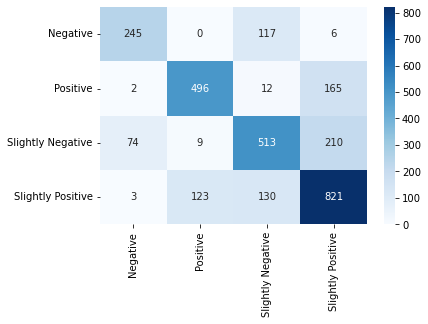

In [132]:
sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')

### Results <a id='Results3'></a>   

In [126]:
result_3 = pd.DataFrame({'Model':['NB Probability Dense/Sparse', 'Stacked Model'],
                        'Accuracy':[stacked_nb_ds_acc, stacked_acc],
                        'F1_Macro':[stacked_nb_ds_macro, stacked_f1_macro],
                        'F1_Micro':[stacked_nb_ds_micro, stacked_f1_micro],
                        'F1_Weighted':[stacked_nb_ds_weighted, stacked_f1_weighted]})

result_3 = result_3.round(3)
result_3

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,NB Probability Dense/Sparse,0.592,0.598,0.592,0.586
1,Stacked Model,0.709,0.710,0.709,0.709


In [127]:
results_full = result_1.append(result_2)
results_full = results_full.append(result_3)

In [128]:
results_full.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,F1_Macro,F1_Micro,F1_Weighted
0,Logistic Regression,0.757,0.753,0.757,0.757
1,Stacked Model,0.709,0.710,0.709,0.709
4,Logistic Regression (CV),0.708,0.712,0.708,0.708
3,GBC,0.701,0.703,0.701,0.701
2,SVC,0.685,0.668,0.685,0.682
5,Logistic Regression (TF),0.675,0.669,0.675,0.674
1,Random Forest,0.629,0.624,0.629,0.627
2,GradientBoostingClassifier (CV),0.615,0.607,0.615,0.611
3,GradientBoostingClassifier (TF),0.604,0.609,0.604,0.601
0,NB Probability Dense/Sparse,0.592,0.598,0.592,0.586


---

Interestingly, the Logistic Regression (simplest model) performed the best out of every other model.

---